In [1]:
from EMPRwithfourbackends import NDEMPRCalculator
import torch
import numpy as np

backends = ['tensorflow', 'pytorch', 'numpy']

2024-12-11 20:43:28.354948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 20:43:28.640614: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733939008.748173    5326 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733939008.778360    5326 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-11 20:43:29.040962: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
torch.manual_seed(0)
G = torch.rand(500,500,500)

In [3]:
# PyTorch 

empr_torch = NDEMPRCalculator(G, supports = 'das', backend='pytorch')
torch_times = {
                "approximation_time": empr_torch.approximation_time,
                "execution_time": empr_torch.excution_time,
              }

# TensorFlow

G = G.numpy()

empr_tf = NDEMPRCalculator(G, supports = 'das', backend='tensorflow')
tf_times    = {
                "approximation_time": empr_tf.approximation_time,
                "execution_time": empr_tf.excution_time,
              }

# Numpy

empr_np = NDEMPRCalculator(G, supports = 'das', backend='numpy')
np_times    = {
                "approximation_time": empr_np.approximation_time,
                "execution_time": empr_np.excution_time,
              }

I0000 00:00:1733939011.727752    5326 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 16165 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


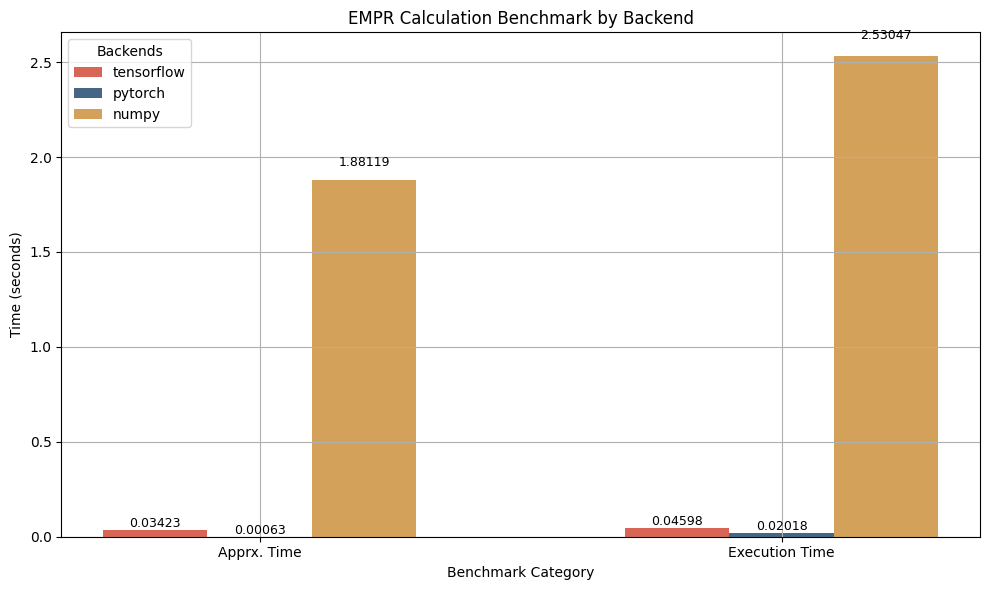

In [ ]:
import matplotlib.pyplot as plt

results = {'pytorch' : torch_times, 'tensorflow' : tf_times, 'numpy' : np_times}

colors = {
    'numpy': '#d4a15a',       # Light gold
    'tensorflow': '#d96557',  # Light red
    'pytorch': '#446785'      # Dark blue
}

# Define the categories to plot and their custom labels
categories = ['approximation_time', 'execution_time']
labels = {'approximation_time': 'Apprx. Time', 'execution_time': 'Execution Time'}

# Collect data for each category and backend
data = {cat: [results[backend][cat] for backend in backends] for cat in categories}

# Set up bar width and positions
bar_width = 0.2
x_positions = np.arange(len(categories))  # Positions for each category
plt.figure(figsize=(10, 6))

# Plot each backend’s data with the corresponding color
for i, backend in enumerate(backends):
    positions = [x + i * bar_width for x in x_positions]  # Offset each backend’s bars within the category group
    values = [data[cat][i] for cat in categories]

    # Plot bars with the assigned color for each backend
    bars = plt.bar(positions, values, color=colors[backend], width=bar_width, label=backend)

    # Add values on top of each bar with a slight offset
    for j, bar in enumerate(bars):
        # Instead of bar.get_height(), use the actual value directly
        yval = values[j]  # Directly use the value from `values` list

        # Display values only if the bar height (value) is non-zero
        if yval > 0:
            # Place text slightly above the bar
            plt.text(
                bar.get_x() + bar.get_width() / 2, 
                yval + 0.03 * yval,  # Offset of 3% of the bar height
                f'{yval:.5f}', 
                ha='center', va='bottom', fontsize=9, color='black'
            )

# Customize x-axis with the category labels at appropriate positions
plt.xticks([r + bar_width for r in range(len(categories))], [labels[cat] for cat in categories])

# Label and formatting
plt.xlabel('Benchmark Category')
plt.ylabel('Time (seconds)')
plt.title('EMPR Calculation Benchmark by Backend')
plt.legend(title="Backends")  # No border for legend

# Display the bar chart
plt.tight_layout()  # Ensure the layout is tight and there is no clipping of text
plt.grid()
plt.savefig('fig1.png')

In [5]:
print('PyTorch Times\t:', torch_times, '\nTensorFlow Times:', tf_times, '\nNumpy Times\t:', np_times)

PyTorch Times	: {'approximation_time': 0.0006306171417236328, 'execution_time': 0.020177602767944336} 
TensorFlow Times: {'approximation_time': 0.03423023223876953, 'execution_time': 0.04598426818847656} 
Numpy Times	: {'approximation_time': 1.8811936378479004, 'execution_time': 2.5304651260375977}
